In [71]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import sunpy
import sunpy.map
plt.style.use("science")
from matplotlib import patches

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


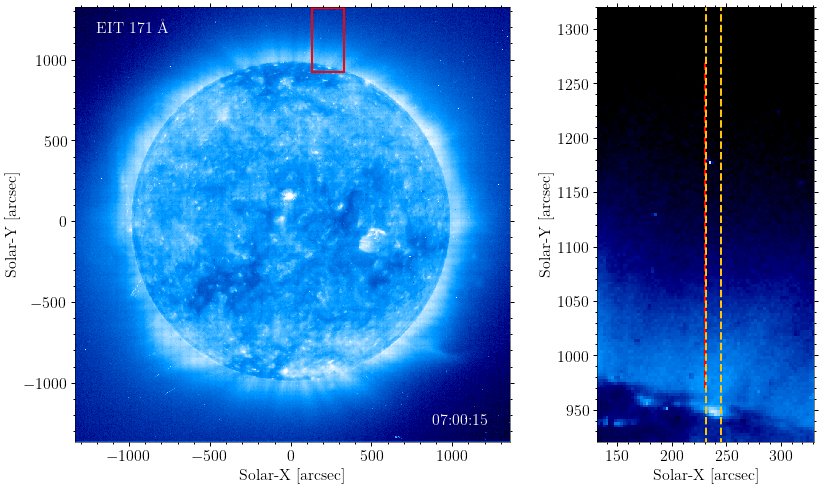

In [74]:
color_map = {171:plt.get_cmap("sohoeit171"),195:plt.get_cmap("sohoeit195"),
             284:plt.get_cmap("sohoeit284"),304:plt.get_cmap("sohoeit304")}

filename = "../save/eit_20071116_l1/eit_l1_20071116_070015.fits" 
sumer_ycen = 1119.81
sumer_xcen = 230.06
slit_color = {171:["red","#FFC408"]}
eis_ycen = 865.277
eis_xleft = 238.523 - 13.9776/2
eis_xright = 238.523 + 13.9776/2
with fits.open(filename) as hdul:
    #hdul.info()
    eit_img = hdul[0].data
    wvl = hdul[0].header["WAVELNTH"]
    xstart = (1-hdul[0].header["CRPIX1"])*hdul[0].header["CDELT1"]
    xend = (hdul[0].header["NAXIS1"]-hdul[0].header["CRPIX1"])*hdul[0].header["CDELT1"]
    ystart = (1-hdul[0].header["CRPIX2"])*hdul[0].header["CDELT2"]
    yend = (hdul[0].header["NAXIS2"]-hdul[0].header["CRPIX2"])*hdul[0].header["CDELT2"]
    xcoord = np.linspace(xstart,xend,hdul[0].header["NAXIS1"])
    ycoord = np.linspace(ystart,yend,hdul[0].header["NAXIS2"])
    
    vmax = np.log10(np.percentile(eit_img,99.97))
    
    fig = plt.subplots(figsize=(14,8))
    ax1 = plt.subplot2grid((1,3),(0,0),rowspan = 1,colspan = 2)
    ax1.pcolormesh(xcoord,ycoord,np.log10(eit_img),cmap=color_map[wvl],
                  vmax = vmax)
    ax1.text(0.05,0.95,"EIT "+str(wvl)+r" \mbox{\AA}",fontsize=16,color="white",
            transform=ax1.transAxes,ha="left",va="center")
    ax1.text(0.95,0.05,hdul[0].header["TIME-OBS"],fontsize=16,color="white",
            transform=ax1.transAxes,ha="right",va="center")
    
    ax2 = plt.subplot2grid((1,3),(0,2),rowspan = 1,colspan = 1)
    zoomin_xpix_start = np.argmin(np.abs(xcoord-sumer_xcen+100))
    zoomin_xpix_end = np.argmin(np.abs(xcoord-sumer_xcen-100))
    zoomin_ypix_start = np.argmin(np.abs(ycoord-sumer_ycen+200))
    zoomin_ypix_end = np.argmin(np.abs(ycoord-sumer_ycen-200))
    
    rec = patches.Rectangle((xcoord[zoomin_xpix_start],ycoord[zoomin_ypix_start]),
                           xcoord[zoomin_xpix_end]-xcoord[zoomin_xpix_start],
                           ycoord[zoomin_ypix_end]-ycoord[zoomin_ypix_start],
                           linewidth=2,edgecolor=slit_color[wvl][0],
                           facecolor="none")
    ax1.add_patch(rec)
    
    ax2.pcolormesh(xcoord[zoomin_xpix_start:zoomin_xpix_end+1],
                   ycoord[zoomin_ypix_start:zoomin_ypix_end+1],
                  np.log10(eit_img[zoomin_ypix_start:zoomin_ypix_end+1,
                                   zoomin_xpix_start:zoomin_xpix_end+1]),
                  cmap=color_map[wvl],vmax = vmax)
    
    ax2.plot([sumer_xcen,sumer_xcen],[sumer_ycen-299.2/2.,sumer_ycen+299.2/2.],
             color=slit_color[wvl][0],ls="--",lw=2,label="SUMER")
    
    ax2.plot([eis_xleft,eis_xleft],[eis_ycen-512./2.,sumer_ycen+512./2.],
             color=slit_color[wvl][1],ls="--",lw=2,label="EIS")
    
    ax2.plot([eis_xright,eis_xright],[eis_ycen-512./2.,sumer_ycen+512./2.],
             color=slit_color[wvl][1],ls="--",lw=2)
    
    for ax_ in (ax1,ax2):
        ax_.axis("scaled")
        ax_.set_xlabel("Solar-X [arcsec]",fontsize=16)
        ax_.set_ylabel("Solar-Y [arcsec]",fontsize=16)
        ax_.tick_params(labelsize=16)
        ax_.tick_params(which="major",width=1,length=4,direction="out")
        ax_.tick_params(which="minor",width=1,length=2,direction='out')
        
    ax2.set_ylim(ycoord[zoomin_ypix_start],ycoord[zoomin_ypix_end])
#hdul[0].header

In [55]:
xcoord[zoomin_xpix_start:zoomin_xpix_end+1].shape

(46,)

In [48]:
eit_img[zoomin_xpix_start:zoomin_xpix_end+1,
                                  zoomin_ypix_start:zoomin_ypix_end+1].shape

(46, 153)

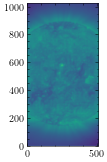

In [53]:
plt.imshow(np.log10(eit_img[:,256:768]),origin="lower")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


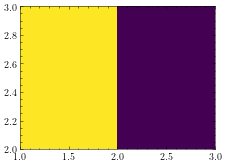

In [57]:
plt.pcolormesh([1,2,3],[2,3],eit_img[0:2,0:3])